# HW03
Welcome to the `assignment 3` of Introduction to Data Analysis.

In this assignment, you will learn how to visualize data using matplotlib and seaborn <br>
and high-dimensional data using t-SNE.

Please follow the instructions below:

1. Write down your code between <br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# BEGIN_YOUR_CODE**<br>
&nbsp;&nbsp;&nbsp;&nbsp; and<br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# END_YOUR_CODE**.

2. Do not use **external libraries**. (i.e., Do not use any `import` in your code) <br>
   Your code will fail to execute and get **0 score** if you use them.

3. Rename this file to **[student_id].ipynb** (e.g. 20230000.ipynb) and submit it to PLMS. <br>
   There is **30% penalty** if you do not follow the submission format.

4. Submission late is not accepted.
   You will get **No score** for late submission. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

np.random.seed(42)

## Problem 1. Matplotlib [15 points]
For this problem, only `matplotlib` is allowed to be used. <br>
Do not use `seaborn` or any other kind of visualization library.

### a. Basic Plot [3 points]
Draw $(X^2 + Y^2 - a)^3 - (X^2Y^3) = 0$ and $y = x$ graphs on one plot. <br>
Check for detailed properties below:

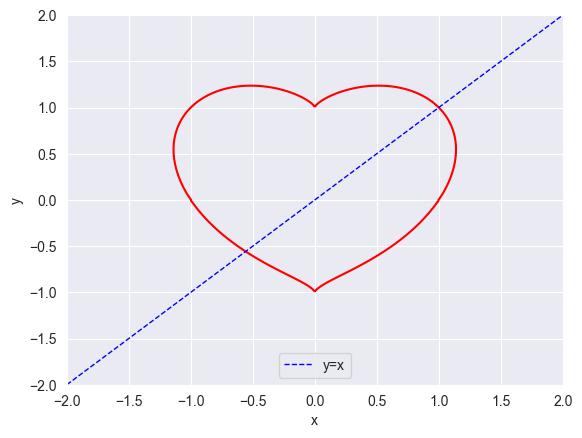

In [2]:
'''
    Draw (X^2 + Y^2 - a)^3 - (X^2Y^3) = 0 and y = x graphs on one plot.
    For y = x graph, add a legend describing it at the bottom of the center.

    The properties of the whole figure are as follow:
        |x_label| - 'x'
        |y_label| - 'y'

    The properties of each graph are as follow:
        (X^2 + Y^2 - a)^3 - (X^2Y^3) = 0
            |color|     - red
            |levels|     - [0]
        
        y = x
            |color|     - blue
            |linewidth| - 1
            |linestyle| - dashed
            |legend|    - r'y = x'
'''
a = 1

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y**2 - a)**3 - (X**2 * Y**3)

# BEGIN_YOUR_CODE
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
first_line = plt.contour(X, Y, Z, colors='red', levels=[0])
second_line = plt.plot(x, x, color='blue', linewidth = 1, linestyle = 'dashed', label = r'y=x')
plt.legend(loc='lower center')
# END_YOUR_CODE
plt.show()


### b. Subplot [3 points]
Draw $y = sin(x)$, $y = cos(x)$, $y = tan(x)$, and $y = sin(x)cos(x)$ graphs on 4 subplots with two rows and two columns. <br>
Draw the figures in the following order:  top-left, top-right, bottom-left, and bottom-right. <br>
Check for detailed properties below:

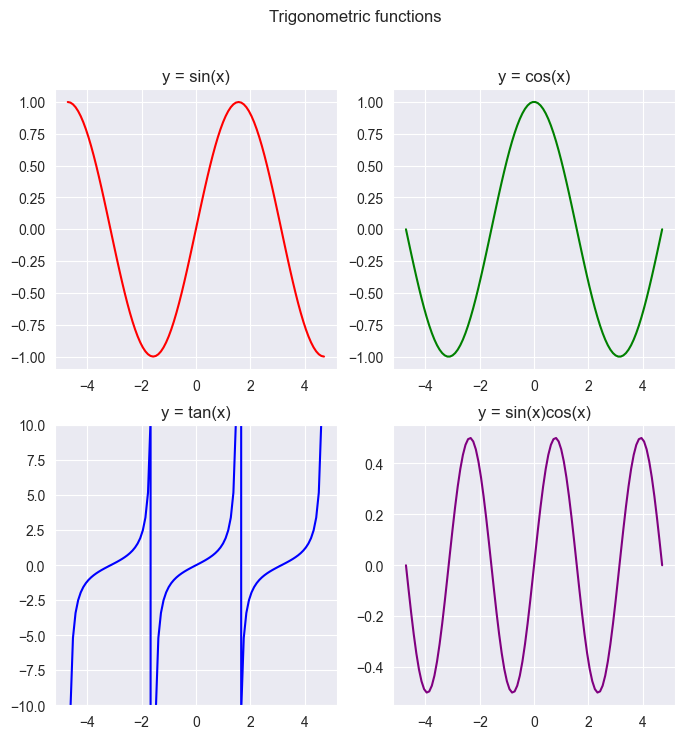

In [3]:
'''
    Draw $y = sin(x)$, $y = cos(x)$, $y = tan(x)$, and $y = sin(x)cos(x)$ graphs on 4 subplots with two rows and two columns.
    The first figure will be placed in the top left, the second one in the top right, 
    the third one in the bottom left, and the last one in the bottom right.
    (i.e. $y = sin(x)$ on the top-left corner and $y = sin(x)cos(x)$ on the bottom-right corner)
    
    The properties of the whole figure are as follow:
        |size|  - (8, 8)
        |title| - 'Trigonometric functions'

    The properties of each graph are as follow:

        y = sin(x)
            |title|   - 'y = sin(x)'
            |color|   - red
        
        y = cos(x)
            |title|   - 'y = cos(x)'
            |color|   - green
        
        y = tan(x)
            |title|   - 'y = tan(x)'
            |color|   - blue
            |y_range| - [-10, 10]
        
        y = sin(x)cos(x)
            |title|   - 'y = sin(x)cos(x)'
            |color|   - purple
'''

x = np.linspace(-1.5* np.pi, 1.5* np.pi, 100)

# BEGIN_YOUR_CODE
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Trigonometric functions')

axs[0, 0].plot(x, np.sin(x), color = 'red')
axs[0, 0].set_title('y = sin(x)')

axs[0, 1].plot(x, np.cos(x), color = 'green')
axs[0, 1].set_title('y = cos(x)')

axs[1, 0].plot(x, np.tan(x), color = 'blue')
axs[1, 0].set_title('y = tan(x)')
axs[1, 0].set_ylim([-10, 10])

axs[1, 1].plot(x, np.sin(x) * np.cos(x), color = 'purple')
axs[1, 1].set_title('y = sin(x)cos(x)')
# END_YOUR_CODE

plt.show()


### c. Histogram [4 points]
Draw the normal distribution $\mathcal{N}(0, 1)$ graph and the histogram of normally sampled values on one plot. <br>
Check for detailed properties below:

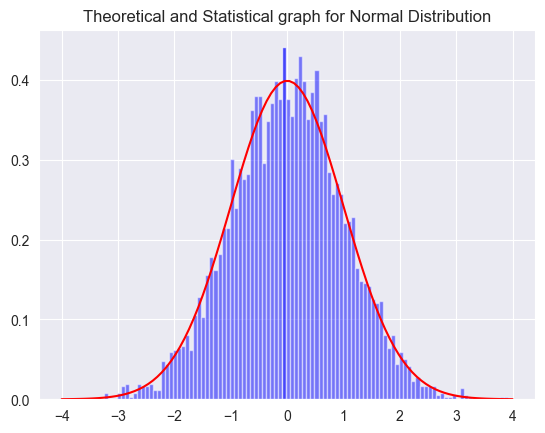

In [4]:
'''
    Draw the normal distribution N(0, 1) graph and the histogram of normally sampled values on one plot.

    The properties of the whole figure are as follow:
        |title| - 'Theoretical and Statistical graph for Normal Distribution'

    The properties of each graph are as follow:
        
        N(0, 1) graph
            |color|     - red
        
        histogram
            # of |bin|  - 100 (each bin should have the same width)
            |color|     - blue
            |alpha|     - 0.7 (for mode bin) / 0.5 (otherwise)
'''

x = np.linspace(-4, 4, 100)

rv = scipy.stats.norm()
theo = rv.pdf(x)

num_sample = 5000
stat = np.random.normal(0, 1, num_sample)

# BEGIN_YOUR_CODE

plt.plot(x, theo, color='red', label='N(0, 1)')

count, bins, patches = plt.hist(stat, bins=100, density=True, color='blue', alpha=0.5)
max_count = np.argmax(count)
patches[max_count].set_alpha(0.7)

plt.title('Theoretical and Statistical graph for Normal Distribution')
# END_YOUR_CODE

plt.show()


### d. Qunatile Plot [2 points]
Draw 20-quantile (i.e., vigiciles) plot of the uniform distribution $U(-3, 3)$. <br>
Check for detailed properties below:

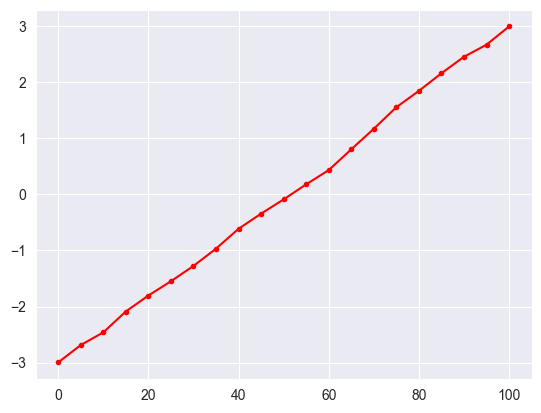

In [5]:
'''
    Draw 20-quantile (also know as vigiciles) plot of the uniform distribution U(-3, 3).

    The properties of each graph are as follow:
        
        quantile plot
            quantile - 20
            |color|  - red
            |marker| - point
'''

a = np.random.uniform(-3, 3, size=1000)
q = np.linspace(0, 100, 21)

# BEGIN_YOUR_CODE
quantiles = np.percentile(a, q)
plt.plot(q, quantiles, color='red', marker='.', label='U(-3, 3)')
# END_YOUR_CODE

plt.show()


### e. Q-Q Plot [3 points]
Draw Q-Q plot comparing $U(-3, 3)$ and $\mathcal{N}(0, 1)$. <br>
Use 20-quantile (i.e., vigiciles) for both distributions. <br>
Also draw a guiding line, $y = x$ graph. <br>
Check for detailed properties below:

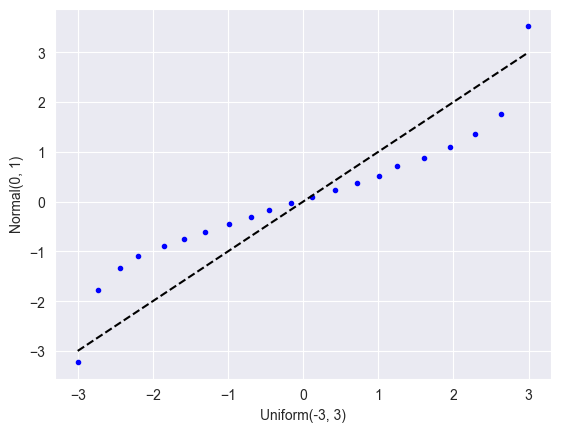

In [6]:
'''
    Draw Q-Q plot comparing U(-3, 3) and N(0, 1).
    Use 20-quantile (i.e., vigiciles) for both distributions.
    Also draw a guiding line, y = x graph.

    The properties of the whole figure are as follow:
        |x_label| - 'Uniform(-3, 3)'
        |y_label| - 'Normal(0, 1)'

    The properties of each graph are as follow:
        
        Q-Q plot
            quantile - 20 (for both)
            |color|     - blue
            |linestyle| - no line (use linestyle='')
            |marker|    - point
            
        
        y = x
            |color|     - black
            |linestyle| - dashed
            
'''

a = np.random.uniform(-3, 3, size=1000)
b = np.random.normal(0, 1, size=1000)
q = np.linspace(0, 100, 21)

x = np.linspace(-3, 3, 100)

# BEGIN_YOUR_CODE
plt.xlabel('Uniform(-3, 3)')
plt.ylabel('Normal(0, 1)')
quantiles_a = np.percentile(a, q)
quantiles_b = np.percentile(b, q)
plt.plot(quantiles_a, quantiles_b, color='blue', linestyle='', marker='.')
plt.plot(x, x, color='black', linestyle='dashed')

# END_YOUR_CODE

plt.show()


## Problem 2. Seaborn [6 points]
For this problem, only `seaborn` is allowed to be used. <br>
Do not use `matplotlib` or any other kind of visualization library.

### Load Dataset [0 points]
`COVID` dataset is used for this problem.

In [7]:
'''
    Data types and descriptions of columns in dataset |COVID| are as follow:
        | Country/Region        | str   : Name of the country or region                                
        | Confirmed             | int   : Number of confirmed COVID-19 cases                           
        | Deaths                | int   : Number of deaths due to COVID-19                             
        | Recovered             | int   : Number of patients recovered from COVID-19                   
        | Active                | int   : Current active infections (Confirmed cases - Deaths - Recovered) 
        | New cases             | int   : Number of newly confirmed COVID-19 cases in the last 24 hours 
        | New deaths            | int   : Number of new COVID-19 deaths reported in the last 24 hours 
        | New recovered         | int   : Number of new recoveries in the last 24 hours               
        | Confirmed last week   | int   : Number of confirmed COVID-19 cases from the previous week    
        | 1 week change         | int   : Change in the number of confirmed cases compared to the previous week 
        | 1 week % increase     | float : Percentage increase in confirmed cases compared to the previous week 
        | WHO Region            | str   : WHO designated region (Eastern Mediterranean, Europe, Africa, Americas, Western Pacific, South-East)
'''

data = pd.read_csv('COVID.csv')
data


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3326,1226,36.86,Africa


### a. Box plot [1 points]
Create a horizontal box plot comparing the `Confirmed` cases across each `WHO Region`. <br> 
The x-axis should be displayed on a logarithmic scale.

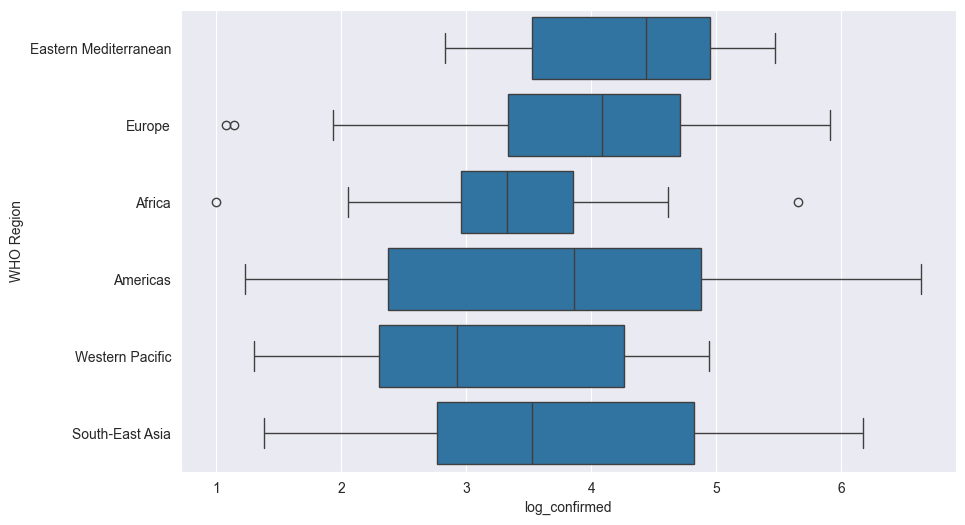

In [8]:
plt.figure(figsize=(10, 6))
# BEGIN_YOUR_CODE
df = pd.DataFrame(data)
df['log_confirmed'] = np.log10(df['Confirmed'])
sns.boxplot(x = df['log_confirmed'], y = df['WHO Region'])
# END_YOUR_CODE
plt.show()


### b. Bar plot [1 points]
Draw a bar plot on `the average Mortality Rate` by `WHO Region` <br>


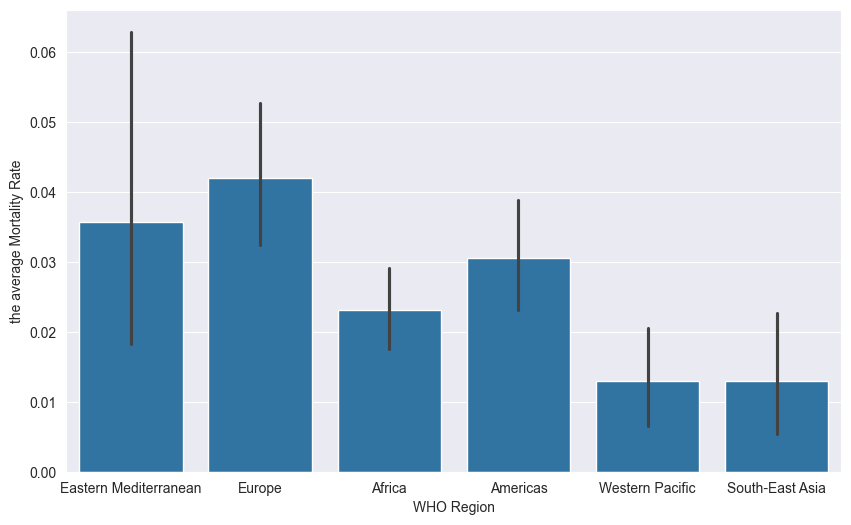

In [9]:
# Add columns
data['Mortality Rate'] = (data['Deaths'] / data['Confirmed']) * 100
data['Recovered Rate'] = (data['Recovered'] / data['Confirmed']) * 100

average_mortality_rate = data.groupby('WHO Region')['Mortality Rate'].mean().reset_index()
plt.figure(figsize=(10, 6))

# BEGIN_YOUR_CODE
df = pd.DataFrame(data)
df['the average Mortality Rate'] = df['Deaths'] / df['Confirmed']
sns.barplot(x = df['WHO Region'], y = df['the average Mortality Rate'])
# END_YOUR_CODE

plt.show()


### c. Histogram and KDE (Kernel Density Estimation) [1 points]
Draw a histogram and KDE for `1 week % increase`.

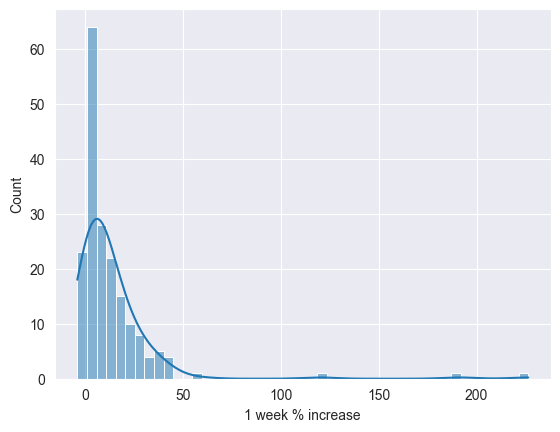

In [10]:
# BEGIN_YOUR_CODE
df = pd.DataFrame(data)
sns.histplot(df['1 week % increase'], kde = True)
# END_YOUR_CODE
plt.show()


### d. Joint plot [1 points]
Draw a joint plot between `Recovered Rate` and `1 week % increase`.

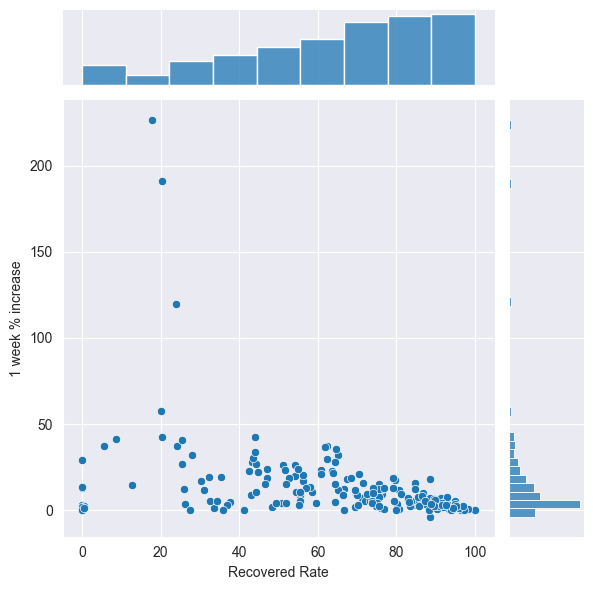

In [11]:
# BEGIN_YOUR_CODE
df = pd.DataFrame(data)
sns.jointplot(x = df['Recovered Rate'], y = df['1 week % increase'])
# END_YOUR_CODE
plt.show()


### e. Heatmap [2 points]
Draw a heatmap using `correlation_matrix` given in the first line <br>
Make sure to: <br>
1. Display correlation values inside the heatmap cells
2. Use the coolwarm color palette for the heatmap
3. Format the correlation values to two decimal places


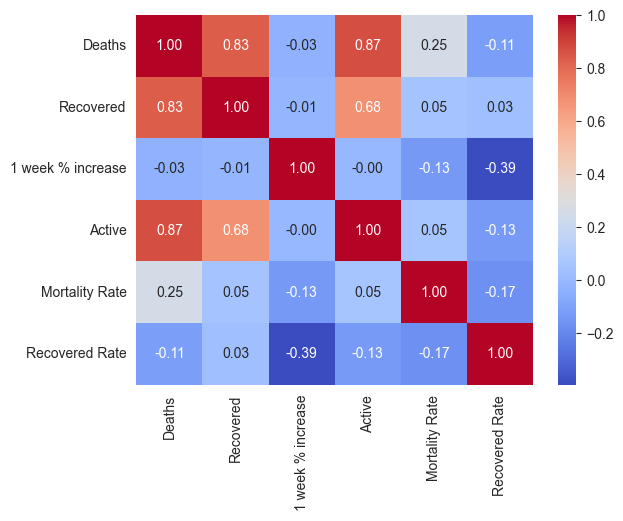

In [12]:
correlation_matrix = data[["Deaths", "Recovered", "1 week % increase", "Active", "Mortality Rate", "Recovered Rate"]].corr()

# BEGIN_YOUR_CODE
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
# END_YOUR_CODE
plt.show()


## Problem 3. t-SNE [4 points]

`wine` dataset is used for this problem

In [13]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
X, y = data['data'], data['target']
X, y

(     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid_phenols

### a. Dimensionality Reduction [2 points]
Apply t-SNE to reduce the dimension of the data in `X` to 3 components. <br>
Store the result in `X_tnse`, and ensure the columns of `X_tnse` are named `component_0`, `component_1`, and `component_2`. <br>
Make sure `X_tnse` is a pandas DataFrame after the transformation.

In [14]:
'''
    Reduce dimension of each data in |X| into 3.
    Note that |X_tnse| should still be pandas dataframe.
'''

# BEGIN_YOUR_CODE
tsne = TSNE(n_components = 3)
X_tsne = tsne.fit_transform(X)
X_tsne = pd.DataFrame(X_tsne, columns = ['component_0', 'component_1', 'component_2'])
# END_YOUR_CODE

### b. Visualization [2 points]
Visualize `X_tnse` for each `y` on one plot using `matplotlib`. <br>
Check for detailed properties below:

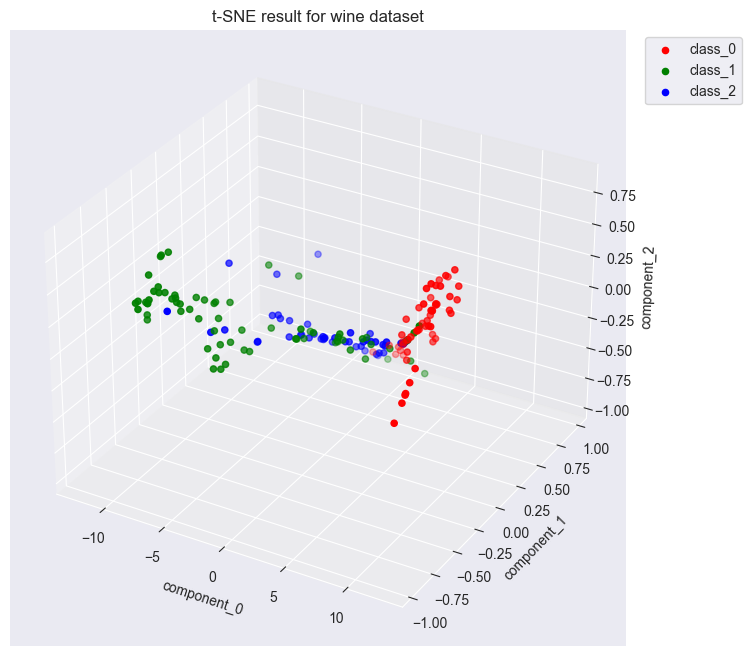

In [26]:
'''
    Visualize |X_tnse| for each |y| on one plot.
    That is, draw one scatter plot for each |y| value.
    For each graph, add legend describing it.

    The properties of the whole figure are as follows:
        |title|   - 't-SNE result for wine dataset'
        |x_label| - 'component_0'
        |y_label| - 'component_1'
        |z_label| - 'component_2'

    The properties of each graph are as follow:

        y = 0
            |color|  - 'red'
            |legend| - 'class_0'

        y = 1
            |color|  - 'green'
            |legend| - 'class_1'

        y = 2
            |color|  - 'blue'
            |legend| - 'class_2'
'''


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# BEGIN_YOUR_CODE
colors = ['red', 'green', 'blue']
labels = ['class_0', 'class_1', 'class_2']

for i in [0, 1, 2]:
    ax.scatter(X_tsne.loc[y == i, 'component_0'], X_tsne.loc[y == i, 'component_1'], X_tsne.loc[y == i, 'component_2'], color = colors[i], label = labels[i])

ax.set_title('t-SNE result for wine dataset')
ax.set_xlabel('component_0')
ax.set_ylabel('component_1')
ax.set_zlabel('component_2')
# END_YOUR_CODE

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  
plt.show()
